In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import special
from scipy.stats import norm

# Combined distributions plot

In [2]:
sigma = 1
mu    = 0
sigma_mu = np.asarray([0.0,0.01,0.5,1.0,1.5,2.0])
mu_mu    = 0.0
x = np.linspace(-6,6,1000)

In [3]:
color     = ['black','C0','C1','C2','C3','C4']
linestyle = [':','-','-','-','-','-',]
zorder    = [3,2,2,2,2,2]

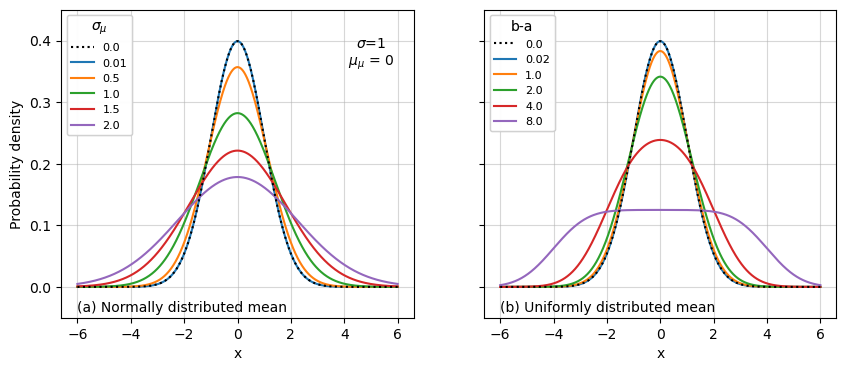

In [4]:
fig, ax = plt.subplots(figsize=(10,4),ncols=2,sharey='row')
for i in range(len(sigma_mu)):
    if(sigma_mu[i]>0):
        fp = 1/np.sqrt(2.0*np.pi*(sigma**2+sigma_mu[i]**2))*np.exp(-0.5*(x-mu_mu)**2/(sigma**2+sigma_mu[i]**2))
    else:
        fp = norm.pdf(x)
    ax[0].plot(x,fp,label=str(sigma_mu[i]),c=color[i],linestyle=linestyle[i],zorder=zorder[i])
ax[0].grid(True,alpha=0.5)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Probability density')
lines = ax[0].get_lines()
legend1 = ax[0].legend([lines[i] for i in range(6)],sigma_mu,title=r'$\sigma_\mu$',loc=2,fontsize=8)
ax[0].add_artist(legend1)
ax[0].annotate(r'$\sigma$=1' + '\n' + r'$\mu_\mu$ = 0',xy=(5,0.36),ha='center')

sigma = 1
mu = 0
a = -np.asarray([0.0,0.01,0.5,1.0,2.0,4.0])
b = -a
for i in range(len(a)):
    if(np.abs(a[i])>0):
        fp = 1/(2*(b[i]-a[i]))*(special.erf(np.sqrt(2)/2*(b[i]-x)/sigma) - special.erf(np.sqrt(2)/2*(a[i]-x)/sigma))
    else:
        fp = norm.pdf(x)
    ax[1].plot(x,fp,label=str(b[i]-a[i]),c=color[i],linestyle=linestyle[i],zorder=zorder[i])
ax[1].grid(True,alpha=0.5)
ax[1].set_xlabel('x')
lines = ax[1].get_lines()
legend1 = ax[1].legend([lines[i] for i in range(6)],-2*a,title='b-a',loc=2,fontsize=8)
ax[1].add_artist(legend1)
ax[0].set_ylim(-0.05,0.45)
ax[0].annotate('(a) Normally distributed mean',xy=(-6,-0.04))
ax[1].annotate('(b) Uniformly distributed mean',xy=(-6,-0.04));